# Revisando el Catálogo

In [1]:
from astropy.cosmology import Planck18 as cosmo

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math

from astropy.cosmology import Planck18 as cosmo #resultados de Planck 2018
from scipy.io import readsav
from astropy.table import Table
from scipy.optimize import fsolve

In [3]:
catalog = scipy.io.readsav('cosmos2020_farmer_phot.sav')

In [4]:
print(catalog.keys())

dict_keys(['id', 'ra', 'dec', 'id2015', 'zphot', 'zlo', 'zhi', 'mag', 'emag', 'logm', 'logmlo', 'logmhi', 'ub0', 'dub0', 'uv0', 'duv0', 'vj0', 'dvj0'])


In [5]:
ra = catalog["ra"]
ra

array([150.47759181, 150.47797762, 150.47702381, ..., 150.07153936,
       150.08864562, 150.08666821])

In [6]:
dec = catalog["dec"]
dec

array([2.32892806, 2.32916986, 2.32948282, ..., 2.87415142, 2.87678241,
       2.87700635])

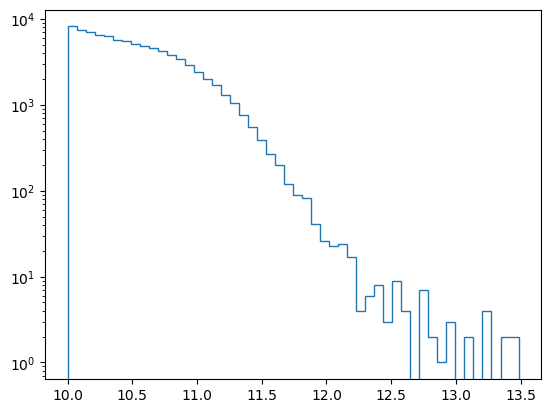

In [7]:
logm = catalog["logm"]
mask_mass = logm > 10
masked_logm = logm[mask_mass]
plt.hist(masked_logm, histtype = "step", bins = 50)
plt.yscale("log")

In [8]:
zphot = catalog["zphot"]
zphot

array([1.593 , 0.1151,    nan, ...,    nan,    nan,    nan])

In [9]:
#Para valores z>2

lista_de_arrays = [np.array(zphot)]
resultados = [array[array > 2] for array in lista_de_arrays]

print(resultados)

#Imprimir la lista completa
#print("Lista completa:")
#for array in resultados:
 #   for elemento in array:
  #      print(elemento, end=' ')

[array([2.8698, 2.8235, 4.775 , ..., 4.2732, 2.6115, 7.6066])]


In [10]:
#Zlow
zlo = catalog["zlo"]
zlo

array([1.514 , 0.0234,    nan, ..., 1.4051, 2.3782, 1.4486])

In [11]:
#Zhi
zhi = catalog["zhi"]
zhi

array([1.6732, 0.4184,    nan, ..., 1.9242, 2.9061, 3.9265])

# Graficos

In [12]:
ra2 = ra[(zphot > 2) & (zphot < 2.1)]
dec2 = dec[(zphot > 2) & (zphot < 2.1)]
z2 = zphot[(zphot > 2) & (zphot < 2.1)]
lower_z = catalog["zlo"][(zphot > 2) & (zphot < 2.1)]
higher_z = catalog["zhi"][(zphot > 2) & (zphot < 2.1)]

Text(0.5, 1.0, 'Distribución de objetos en el plano RA-DEC')

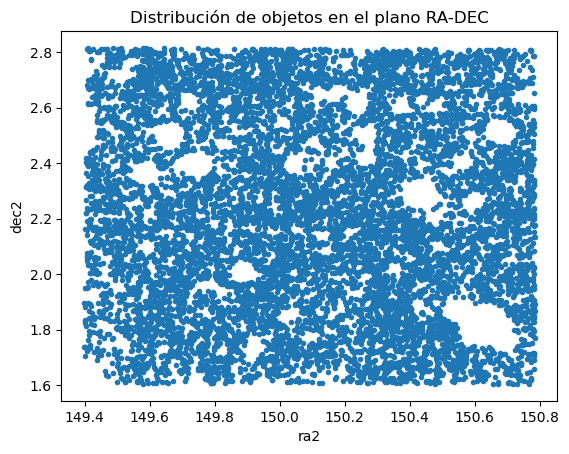

In [13]:
# Datos 
x = np.array(ra2)
y = np.array(dec2)

fig, ax = plt.subplots()
ax.scatter(x, y, marker = ".")

plt.xlabel('ra2')
plt.ylabel('dec2')
plt.title('Distribución de objetos en el plano RA-DEC')

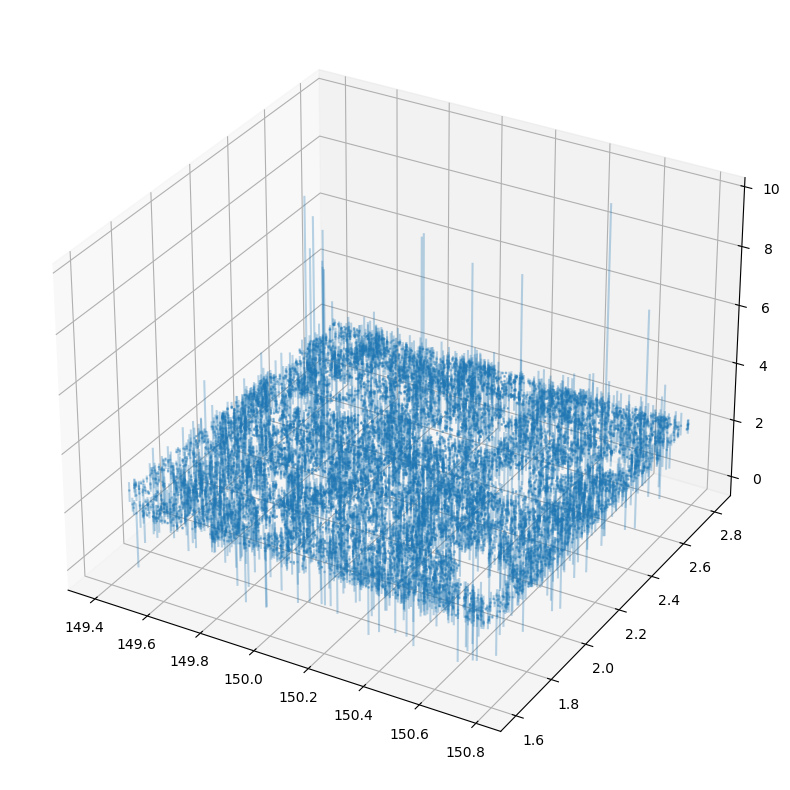

In [14]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.errorbar(ra2,dec2,z2, zerr = np.stack((z2 - lower_z, higher_z - z2)), fmt = "None", alpha = 0.3)
ax.scatter(ra2,dec2,z2, s = 1, alpha = 0.3)

Text(0.5, 1.0, 'X-axis histogram')

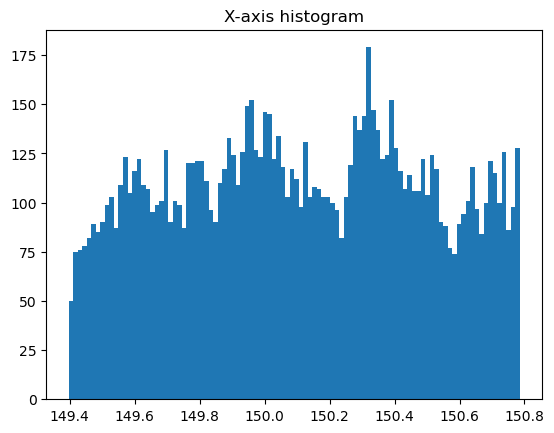

In [15]:
plt.hist(x, bins = 100);
plt.title("X-axis histogram")

Text(0.5, 1.0, 'Y-axis histogram')

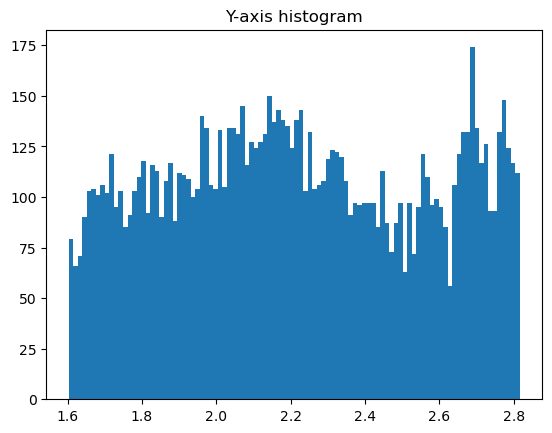

In [16]:
plt.hist(y, bins = 100);
plt.title("Y-axis histogram")

### Mapa de Densidad 
Juntando los graficos de histograma en el eje x e y, para que quede "grillado"

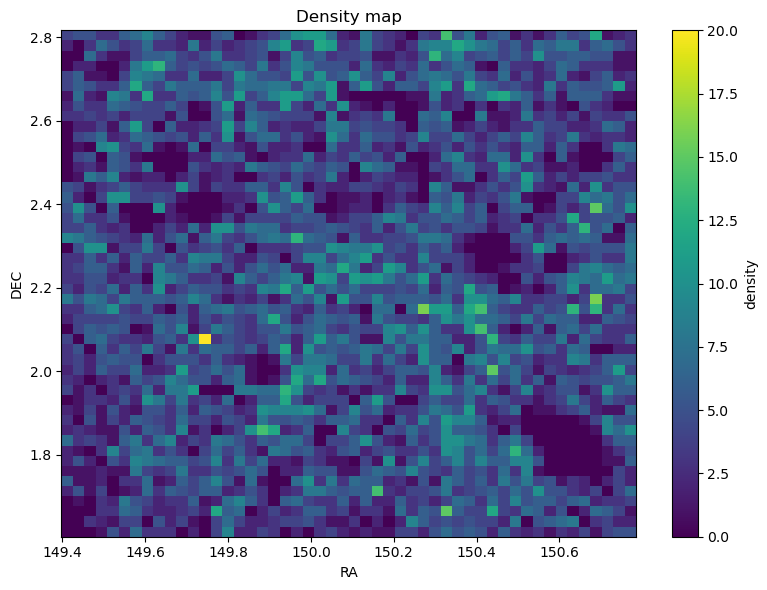

In [28]:
import matplotlib as mpl
from matplotlib import cm

fig = plt.figure(figsize = (8,6))
hist = np.histogram2d(x,y,bins = 50)
#c = hist[0].flatten()
#color = cm.viridis
#norm = mpl.colors.Normalize(vmin=0, vmax=np.max(c))
hist = plt.hist2d(x,y,bins = 50, cmap = color, norm = norm);
plt.colorbar(label = "density")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Density map")
fig.tight_layout()

### Distancia de las galaxias, tamañol pixel 0.005

In [21]:
catalog = readsav('cosmos2020_farmer_phot.sav')
zphot = catalog["zphot"]
zhi, zlo = catalog["zhi"], catalog["zlo"]
ra, dec = catalog["ra"], catalog["dec"], 
logm = catalog["logm"]
logmlo, logmhi = catalog["logmlo"], catalog["logmhi"]

In [22]:
mask_logm = logm > 10
zphot = zphot[mask_logm]
zhi, zlo = zhi[mask_logm], zlo[mask_logm]
logm = logm[mask_logm]
logmhi, logmlo = logmhi[mask_logm], logmlo[mask_logm]
ra, dec = ra[mask_logm], dec[mask_logm]

mask_redshift = zphot > 2
zphot = zphot[mask_redshift]
zhi, zlo = zhi[mask_redshift], zlo[mask_redshift]
logm = logm[mask_redshift]
logmhi, logmlo = logmhi[mask_redshift], logmlo[mask_redshift]
ra, dec = ra[mask_redshift], dec[mask_redshift]

Calculando densidad...:   0%|          | 0/314 [00:00<?, ?it/s]

pixel size = 0.00500

Calculando densidad...:   0%|          | 1/314 [00:14<1:17:45, 14.90s/it]

pixel size = 0.00500

Calculando densidad...:   1%|          | 2/314 [00:30<1:18:57, 15.18s/it]

pixel size = 0.01000

Calculando densidad...:   1%|          | 3/314 [00:46<1:20:38, 15.56s/it]

pixel size = 0.01000

Calculando densidad...:   1%|▏         | 4/314 [01:03<1:23:46, 16.21s/it]

pixel size = 0.01500

Calculando densidad...:   2%|▏         | 5/314 [01:20<1:25:36, 16.62s/it]

pixel size = 0.02000

Calculando densidad...:   2%|▏         | 6/314 [01:39<1:28:09, 17.17s/it]

pixel size = 0.02000

Calculando densidad...:   2%|▏         | 7/314 [01:58<1:31:26, 17.87s/it]

pixel size = 0.01500

Calculando densidad...:   3%|▎         | 8/314 [02:19<1:35:55, 18.81s/it]

pixel size = 0.01000

Calculando densidad...:   3%|▎         | 9/314 [02:41<1:40:40, 19.80s/it]

pixel size = 0.00500

Calculando densidad...:   3%|▎         | 10/314 [03:07<1:49:44, 21.66s/it]

pixel size = 0.00500

Calculando densidad...:   4%|▎         | 11/314 [03:36<2:01:58, 24.15s/it]

pixel size = 0.00500

Calculando densidad...:   4%|▍         | 12/314 [04:09<2:15:08, 26.85s/it]

pixel size = 0.00500

Calculando densidad...:   4%|▍         | 13/314 [04:43<2:24:37, 28.83s/it]

pixel size = 0.00500

Calculando densidad...:   4%|▍         | 14/314 [05:17<2:32:29, 30.50s/it]

pixel size = 0.00500

Calculando densidad...:   5%|▍         | 15/314 [05:50<2:35:10, 31.14s/it]

pixel size = 0.00500

Calculando densidad...:   5%|▌         | 16/314 [06:21<2:35:25, 31.29s/it]

pixel size = 0.00500

Calculando densidad...:   5%|▌         | 17/314 [06:51<2:33:02, 30.92s/it]

pixel size = 0.01000

Calculando densidad...:   6%|▌         | 18/314 [07:20<2:28:54, 30.18s/it]

pixel size = 0.01000

Calculando densidad...:   6%|▌         | 19/314 [07:47<2:23:45, 29.24s/it]

pixel size = 0.00500

Calculando densidad...:   6%|▋         | 20/314 [08:13<2:18:53, 28.35s/it]

pixel size = 0.00500

Calculando densidad...:   7%|▋         | 21/314 [08:40<2:15:40, 27.78s/it]

pixel size = 0.00500

Calculando densidad...:   7%|▋         | 22/314 [09:05<2:10:59, 26.92s/it]

pixel size = 0.00500

Calculando densidad...:   7%|▋         | 23/314 [09:30<2:08:57, 26.59s/it]

pixel size = 0.00500

Calculando densidad...:   8%|▊         | 24/314 [09:57<2:08:23, 26.56s/it]

pixel size = 0.00500

Calculando densidad...:   8%|▊         | 25/314 [10:25<2:10:27, 27.09s/it]

pixel size = 0.00500

Calculando densidad...:   8%|▊         | 26/314 [10:55<2:14:10, 27.95s/it]

pixel size = 0.00500

Calculando densidad...:   9%|▊         | 27/314 [11:26<2:17:32, 28.76s/it]

pixel size = 0.00500

Calculando densidad...:   9%|▉         | 28/314 [11:56<2:19:19, 29.23s/it]

pixel size = 0.00500

Calculando densidad...:   9%|▉         | 29/314 [12:28<2:22:44, 30.05s/it]

pixel size = 0.00500

Calculando densidad...:  10%|▉         | 30/314 [13:01<2:26:56, 31.04s/it]

pixel size = 0.00500

Calculando densidad...:  10%|▉         | 31/314 [13:36<2:31:37, 32.15s/it]

pixel size = 0.01000

Calculando densidad...:  10%|█         | 32/314 [14:11<2:35:09, 33.01s/it]

pixel size = 0.00500

Calculando densidad...:  11%|█         | 33/314 [14:47<2:37:50, 33.70s/it]

pixel size = 0.00500

Calculando densidad...:  11%|█         | 34/314 [15:21<2:39:00, 34.07s/it]

pixel size = 0.00500

Calculando densidad...:  11%|█         | 35/314 [15:55<2:37:32, 33.88s/it]

pixel size = 0.00500

Calculando densidad...:  11%|█▏        | 36/314 [16:27<2:34:50, 33.42s/it]

pixel size = 0.00500

Calculando densidad...:  12%|█▏        | 37/314 [16:57<2:29:13, 32.32s/it]

pixel size = 0.00500

Calculando densidad...:  12%|█▏        | 38/314 [17:25<2:22:42, 31.02s/it]

pixel size = 0.00500

Calculando densidad...:  12%|█▏        | 39/314 [17:51<2:14:41, 29.39s/it]

pixel size = 0.00500

Calculando densidad...:  13%|█▎        | 40/314 [18:14<2:06:35, 27.72s/it]

pixel size = 0.00500

Calculando densidad...:  13%|█▎        | 41/314 [18:36<1:58:26, 26.03s/it]

pixel size = 0.00500

Calculando densidad...:  13%|█▎        | 42/314 [18:56<1:49:03, 24.06s/it]

pixel size = 0.00500

Calculando densidad...:  14%|█▎        | 43/314 [19:14<1:40:19, 22.21s/it]

pixel size = 0.00500

Calculando densidad...:  14%|█▍        | 44/314 [19:32<1:34:00, 20.89s/it]

pixel size = 0.00500

Calculando densidad...:  14%|█▍        | 45/314 [19:48<1:27:00, 19.41s/it]

pixel size = 0.00500

Calculando densidad...:  15%|█▍        | 46/314 [20:02<1:19:58, 17.90s/it]

pixel size = 0.00500

Calculando densidad...:  15%|█▍        | 47/314 [20:17<1:15:15, 16.91s/it]

pixel size = 0.00500

Calculando densidad...:  15%|█▌        | 48/314 [20:32<1:12:58, 16.46s/it]

pixel size = 0.00500

Calculando densidad...:  16%|█▌        | 49/314 [20:48<1:11:49, 16.26s/it]

pixel size = 0.00500

Calculando densidad...:  16%|█▌        | 50/314 [21:03<1:10:17, 15.98s/it]

pixel size = 0.00500

Calculando densidad...:  16%|█▌        | 51/314 [21:17<1:07:21, 15.37s/it]

pixel size = 0.00500

Calculando densidad...:  17%|█▋        | 52/314 [21:31<1:05:21, 14.97s/it]

pixel size = 0.00500

Calculando densidad...:  17%|█▋        | 53/314 [21:46<1:04:57, 14.93s/it]

pixel size = 0.00500

Calculando densidad...:  17%|█▋        | 54/314 [22:02<1:05:47, 15.18s/it]

pixel size = 0.00500

Calculando densidad...:  18%|█▊        | 55/314 [22:20<1:09:04, 16.00s/it]

pixel size = 0.00500

Calculando densidad...:  18%|█▊        | 56/314 [22:37<1:11:04, 16.53s/it]

pixel size = 0.00500

Calculando densidad...:  18%|█▊        | 57/314 [22:56<1:12:53, 17.02s/it]

pixel size = 0.01000

Calculando densidad...:  18%|█▊        | 58/314 [23:14<1:14:59, 17.58s/it]

pixel size = 0.01500

Calculando densidad...:  19%|█▉        | 59/314 [23:33<1:16:36, 18.03s/it]

pixel size = 0.02000

Calculando densidad...:  19%|█▉        | 60/314 [23:52<1:16:29, 18.07s/it]

pixel size = 0.02500

Calculando densidad...:  19%|█▉        | 61/314 [24:09<1:15:01, 17.79s/it]

pixel size = 0.02000

Calculando densidad...:  20%|█▉        | 62/314 [24:27<1:14:42, 17.79s/it]

pixel size = 0.01500

Calculando densidad...:  20%|██        | 63/314 [24:44<1:13:28, 17.56s/it]

pixel size = 0.01000

Calculando densidad...:  20%|██        | 64/314 [25:01<1:13:10, 17.56s/it]

pixel size = 0.00500

Calculando densidad...:  21%|██        | 65/314 [25:19<1:13:48, 17.79s/it]

pixel size = 0.00500

Calculando densidad...:  21%|██        | 66/314 [25:37<1:13:31, 17.79s/it]

pixel size = 0.01000

Calculando densidad...:  21%|██▏       | 67/314 [25:56<1:13:58, 17.97s/it]

pixel size = 0.00500

Calculando densidad...:  22%|██▏       | 68/314 [26:15<1:15:30, 18.42s/it]

pixel size = 0.01500

Calculando densidad...:  22%|██▏       | 69/314 [26:38<1:20:05, 19.62s/it]

pixel size = 0.02000

Calculando densidad...:  22%|██▏       | 70/314 [27:02<1:26:03, 21.16s/it]

pixel size = 0.02000

Calculando densidad...:  23%|██▎       | 71/314 [27:28<1:31:35, 22.62s/it]

pixel size = 0.02500

Calculando densidad...:  23%|██▎       | 72/314 [27:55<1:36:21, 23.89s/it]

pixel size = 0.02000

Calculando densidad...:  23%|██▎       | 73/314 [28:21<1:38:46, 24.59s/it]

pixel size = 0.02000

Calculando densidad...:  24%|██▎       | 74/314 [28:46<1:38:41, 24.67s/it]

pixel size = 0.01500

Calculando densidad...:  24%|██▍       | 75/314 [29:10<1:36:45, 24.29s/it]

pixel size = 0.00500

Calculando densidad...:  24%|██▍       | 76/314 [29:30<1:31:06, 22.97s/it]

pixel size = 0.00500

Calculando densidad...:  25%|██▍       | 77/314 [29:48<1:25:14, 21.58s/it]

pixel size = 0.00500

Calculando densidad...:  25%|██▍       | 78/314 [30:06<1:20:45, 20.53s/it]

pixel size = 0.00500

Calculando densidad...:  25%|██▌       | 79/314 [30:25<1:18:15, 19.98s/it]

pixel size = 0.00500

Calculando densidad...:  25%|██▌       | 80/314 [30:45<1:17:57, 19.99s/it]

pixel size = 0.00500

Calculando densidad...:  26%|██▌       | 81/314 [31:09<1:22:50, 21.33s/it]

pixel size = 0.00500

Calculando densidad...:  26%|██▌       | 82/314 [31:34<1:27:03, 22.52s/it]

pixel size = 0.00500

Calculando densidad...:  26%|██▋       | 83/314 [31:58<1:28:25, 22.97s/it]

pixel size = 0.00500

Calculando densidad...:  27%|██▋       | 84/314 [32:23<1:29:25, 23.33s/it]

pixel size = 0.00500

Calculando densidad...:  27%|██▋       | 85/314 [32:47<1:30:17, 23.66s/it]

pixel size = 0.00500

Calculando densidad...:  27%|██▋       | 86/314 [33:13<1:32:02, 24.22s/it]

pixel size = 0.00500

Calculando densidad...:  28%|██▊       | 87/314 [33:33<1:27:49, 23.21s/it]

pixel size = 0.00500

Calculando densidad...:  28%|██▊       | 88/314 [33:54<1:24:52, 22.53s/it]

pixel size = 0.00500

Calculando densidad...:  28%|██▊       | 89/314 [34:15<1:21:51, 21.83s/it]

pixel size = 0.00500

Calculando densidad...:  29%|██▊       | 90/314 [34:34<1:18:59, 21.16s/it]

pixel size = 0.00500

Calculando densidad...:  29%|██▉       | 91/314 [34:53<1:16:03, 20.47s/it]

pixel size = 0.00500

Calculando densidad...:  29%|██▉       | 92/314 [35:11<1:13:20, 19.82s/it]

pixel size = 0.00500

Calculando densidad...:  30%|██▉       | 93/314 [35:29<1:11:05, 19.30s/it]

pixel size = 0.00500

Calculando densidad...:  30%|██▉       | 94/314 [35:48<1:10:17, 19.17s/it]

pixel size = 0.00500

Calculando densidad...:  30%|███       | 95/314 [36:07<1:09:11, 18.96s/it]

pixel size = 0.00500

Calculando densidad...:  31%|███       | 96/314 [36:27<1:09:58, 19.26s/it]

pixel size = 0.00500

Calculando densidad...:  31%|███       | 97/314 [36:48<1:11:27, 19.76s/it]

pixel size = 0.00500

Calculando densidad...:  31%|███       | 98/314 [37:10<1:14:09, 20.60s/it]

pixel size = 0.00500

Calculando densidad...:  32%|███▏      | 99/314 [37:34<1:17:29, 21.62s/it]

pixel size = 0.00500

Calculando densidad...:  32%|███▏      | 100/314 [37:59<1:20:15, 22.50s/it]

pixel size = 0.00500

Calculando densidad...:  32%|███▏      | 101/314 [38:23<1:22:05, 23.12s/it]

pixel size = 0.01000

Calculando densidad...:  32%|███▏      | 102/314 [38:49<1:24:00, 23.78s/it]

pixel size = 0.01500

Calculando densidad...:  33%|███▎      | 103/314 [39:14<1:24:54, 24.15s/it]

pixel size = 0.01000

Calculando densidad...:  33%|███▎      | 104/314 [39:39<1:26:11, 24.63s/it]

pixel size = 0.00500

Calculando densidad...:  33%|███▎      | 105/314 [40:03<1:24:59, 24.40s/it]

pixel size = 0.00500

Calculando densidad...:  34%|███▍      | 106/314 [40:25<1:22:14, 23.72s/it]

pixel size = 0.00500

Calculando densidad...:  34%|███▍      | 107/314 [40:47<1:19:06, 22.93s/it]

pixel size = 0.00500

Calculando densidad...:  34%|███▍      | 108/314 [41:06<1:14:42, 21.76s/it]

pixel size = 0.00500

Calculando densidad...:  35%|███▍      | 109/314 [41:24<1:10:37, 20.67s/it]

pixel size = 0.00500

Calculando densidad...:  35%|███▌      | 110/314 [41:42<1:07:25, 19.83s/it]

pixel size = 0.00500

Calculando densidad...:  35%|███▌      | 111/314 [41:58<1:03:42, 18.83s/it]

pixel size = 0.00500

Calculando densidad...:  36%|███▌      | 112/314 [42:14<1:00:39, 18.02s/it]

pixel size = 0.00500

Calculando densidad...:  36%|███▌      | 113/314 [42:30<57:57, 17.30s/it]  

pixel size = 0.00500

Calculando densidad...:  36%|███▋      | 114/314 [42:45<55:33, 16.67s/it]

pixel size = 0.00500

Calculando densidad...:  37%|███▋      | 115/314 [43:00<53:30, 16.13s/it]

pixel size = 0.00500

Calculando densidad...:  37%|███▋      | 116/314 [43:15<52:41, 15.97s/it]

pixel size = 0.00500

Calculando densidad...:  37%|███▋      | 117/314 [43:31<52:07, 15.87s/it]

pixel size = 0.00500

Calculando densidad...:  38%|███▊      | 118/314 [43:47<51:50, 15.87s/it]

pixel size = 0.00500

Calculando densidad...:  38%|███▊      | 119/314 [44:02<51:00, 15.69s/it]

pixel size = 0.00500

Calculando densidad...:  38%|███▊      | 120/314 [44:18<51:10, 15.83s/it]

pixel size = 0.00500

Calculando densidad...:  39%|███▊      | 121/314 [44:34<51:07, 15.89s/it]

pixel size = 0.00500

Calculando densidad...:  39%|███▉      | 122/314 [44:50<50:52, 15.90s/it]

pixel size = 0.00500

Calculando densidad...:  39%|███▉      | 123/314 [45:07<51:07, 16.06s/it]

pixel size = 0.00500

Calculando densidad...:  39%|███▉      | 124/314 [45:24<51:35, 16.29s/it]

pixel size = 0.00500

Calculando densidad...:  40%|███▉      | 125/314 [45:41<52:38, 16.71s/it]

pixel size = 0.00500

Calculando densidad...:  40%|████      | 126/314 [45:58<52:28, 16.75s/it]

pixel size = 0.00500

Calculando densidad...:  40%|████      | 127/314 [46:16<52:54, 16.98s/it]

pixel size = 0.00500

Calculando densidad...:  41%|████      | 128/314 [46:34<53:37, 17.30s/it]

pixel size = 0.00500

Calculando densidad...:  41%|████      | 129/314 [46:52<54:33, 17.70s/it]

pixel size = 0.00500

Calculando densidad...:  41%|████▏     | 130/314 [47:11<55:25, 18.08s/it]

pixel size = 0.00500

Calculando densidad...:  42%|████▏     | 131/314 [47:31<56:34, 18.55s/it]

pixel size = 0.00500

Calculando densidad...:  42%|████▏     | 132/314 [47:50<56:31, 18.64s/it]

pixel size = 0.00500

Calculando densidad...:  42%|████▏     | 133/314 [48:08<55:54, 18.53s/it]

pixel size = 0.00500

Calculando densidad...:  43%|████▎     | 134/314 [48:26<55:10, 18.39s/it]

pixel size = 0.00500

Calculando densidad...:  43%|████▎     | 135/314 [48:44<54:11, 18.16s/it]

pixel size = 0.00500

Calculando densidad...:  43%|████▎     | 136/314 [49:01<53:21, 17.99s/it]

pixel size = 0.00500

Calculando densidad...:  44%|████▎     | 137/314 [49:19<52:56, 17.95s/it]

pixel size = 0.00500

Calculando densidad...:  44%|████▍     | 138/314 [49:36<52:02, 17.74s/it]

pixel size = 0.00500

Calculando densidad...:  44%|████▍     | 139/314 [49:52<49:58, 17.13s/it]

pixel size = 0.00500

Calculando densidad...:  45%|████▍     | 140/314 [50:08<48:43, 16.80s/it]

pixel size = 0.00500

Calculando densidad...:  45%|████▍     | 141/314 [50:24<47:30, 16.48s/it]

pixel size = 0.00500

Calculando densidad...:  45%|████▌     | 142/314 [50:40<46:35, 16.25s/it]

pixel size = 0.00500

Calculando densidad...:  46%|████▌     | 143/314 [50:56<46:06, 16.18s/it]

pixel size = 0.00500

Calculando densidad...:  46%|████▌     | 144/314 [51:11<45:29, 16.06s/it]

pixel size = 0.00500

Calculando densidad...:  46%|████▌     | 145/314 [51:27<44:32, 15.81s/it]

pixel size = 0.00500

Calculando densidad...:  46%|████▋     | 146/314 [51:42<43:42, 15.61s/it]

pixel size = 0.00500

Calculando densidad...:  47%|████▋     | 147/314 [51:57<42:55, 15.42s/it]

pixel size = 0.00500

Calculando densidad...:  47%|████▋     | 148/314 [52:11<41:53, 15.14s/it]

pixel size = 0.00500

Calculando densidad...:  47%|████▋     | 149/314 [52:25<40:43, 14.81s/it]

pixel size = 0.00500

Calculando densidad...:  48%|████▊     | 150/314 [52:39<39:38, 14.50s/it]

pixel size = 0.00500

Calculando densidad...:  48%|████▊     | 151/314 [52:54<39:52, 14.68s/it]

pixel size = 0.00500

Calculando densidad...:  48%|████▊     | 152/314 [53:09<39:56, 14.79s/it]

pixel size = 0.00500

Calculando densidad...:  49%|████▊     | 153/314 [53:25<40:11, 14.98s/it]

pixel size = 0.00500

Calculando densidad...:  49%|████▉     | 154/314 [53:41<41:10, 15.44s/it]

pixel size = 0.00500

Calculando densidad...:  49%|████▉     | 155/314 [53:58<42:22, 15.99s/it]

pixel size = 0.00500

Calculando densidad...:  50%|████▉     | 156/314 [54:17<43:51, 16.66s/it]

pixel size = 0.00500

Calculando densidad...:  50%|█████     | 157/314 [54:35<44:48, 17.12s/it]

pixel size = 0.00500

Calculando densidad...:  50%|█████     | 158/314 [54:53<45:02, 17.33s/it]

pixel size = 0.00500

Calculando densidad...:  51%|█████     | 159/314 [55:11<45:11, 17.50s/it]

pixel size = 0.00500

Calculando densidad...:  51%|█████     | 160/314 [55:29<45:54, 17.88s/it]

pixel size = 0.00500

Calculando densidad...:  51%|█████▏    | 161/314 [55:48<46:19, 18.17s/it]

pixel size = 0.00500

Calculando densidad...:  52%|█████▏    | 162/314 [56:10<48:29, 19.14s/it]

pixel size = 0.00500

Calculando densidad...:  52%|█████▏    | 163/314 [1:00:37<3:55:55, 93.75s/it]

pixel size = 0.00500

Calculando densidad...:  52%|█████▏    | 164/314 [1:00:55<2:57:34, 71.03s/it]

pixel size = 0.00500

Calculando densidad...:  53%|█████▎    | 165/314 [1:01:12<2:15:42, 54.65s/it]

pixel size = 0.00500

Calculando densidad...:  53%|█████▎    | 166/314 [1:01:28<1:46:13, 43.07s/it]

pixel size = 0.00500

Calculando densidad...:  53%|█████▎    | 167/314 [1:01:44<1:25:50, 35.04s/it]

pixel size = 0.00500

Calculando densidad...:  54%|█████▎    | 168/314 [1:02:00<1:11:08, 29.24s/it]

pixel size = 0.00500

Calculando densidad...:  54%|█████▍    | 169/314 [1:02:16<1:00:57, 25.22s/it]

pixel size = 0.00500

Calculando densidad...:  54%|█████▍    | 170/314 [1:02:31<53:36, 22.34s/it]  

pixel size = 0.00500

Calculando densidad...:  54%|█████▍    | 171/314 [1:02:47<48:12, 20.23s/it]

pixel size = 0.00500

Calculando densidad...:  55%|█████▍    | 172/314 [1:03:01<43:53, 18.55s/it]

pixel size = 0.00500

Calculando densidad...:  55%|█████▌    | 173/314 [1:03:18<42:29, 18.08s/it]

pixel size = 0.00500

Calculando densidad...:  55%|█████▌    | 174/314 [1:03:35<41:17, 17.69s/it]

pixel size = 0.00500

Calculando densidad...:  56%|█████▌    | 175/314 [1:03:53<41:15, 17.81s/it]

pixel size = 0.00500

Calculando densidad...:  56%|█████▌    | 176/314 [1:04:11<41:05, 17.87s/it]

pixel size = 0.00500

Calculando densidad...:  56%|█████▋    | 177/314 [1:04:29<41:04, 17.99s/it]

pixel size = 0.00500

Calculando densidad...:  57%|█████▋    | 178/314 [1:04:48<40:58, 18.07s/it]

pixel size = 0.00500

Calculando densidad...:  57%|█████▋    | 179/314 [1:05:05<40:15, 17.89s/it]

pixel size = 0.00500

Calculando densidad...:  57%|█████▋    | 180/314 [1:05:22<39:25, 17.65s/it]

pixel size = 0.00500

Calculando densidad...:  58%|█████▊    | 181/314 [1:05:40<39:15, 17.71s/it]

pixel size = 0.00500

Calculando densidad...:  58%|█████▊    | 182/314 [1:05:57<38:27, 17.48s/it]

pixel size = 0.00500

Calculando densidad...:  58%|█████▊    | 183/314 [1:06:13<37:27, 17.15s/it]

pixel size = 0.00500

Calculando densidad...:  59%|█████▊    | 184/314 [1:06:30<36:48, 16.99s/it]

pixel size = 0.00500

Calculando densidad...:  59%|█████▉    | 185/314 [1:06:47<36:41, 17.07s/it]

pixel size = 0.00500

Calculando densidad...:  59%|█████▉    | 186/314 [1:07:03<35:49, 16.79s/it]

pixel size = 0.00500

Calculando densidad...:  60%|█████▉    | 187/314 [1:07:19<34:39, 16.37s/it]

pixel size = 0.00500

Calculando densidad...:  60%|█████▉    | 188/314 [1:07:35<33:59, 16.19s/it]

pixel size = 0.00500

Calculando densidad...:  60%|██████    | 189/314 [1:07:50<33:30, 16.09s/it]

pixel size = 0.00500

Calculando densidad...:  61%|██████    | 190/314 [1:08:07<33:44, 16.33s/it]

pixel size = 0.00500

Calculando densidad...:  61%|██████    | 191/314 [1:08:24<33:38, 16.41s/it]

pixel size = 0.00500

Calculando densidad...:  61%|██████    | 192/314 [1:08:40<33:17, 16.37s/it]

pixel size = 0.00500

Calculando densidad...:  61%|██████▏   | 193/314 [1:08:58<33:40, 16.70s/it]

pixel size = 0.00500

Calculando densidad...:  62%|██████▏   | 194/314 [1:09:15<33:43, 16.86s/it]

pixel size = 0.01000

Calculando densidad...:  62%|██████▏   | 195/314 [1:09:32<33:24, 16.84s/it]

pixel size = 0.00500

Calculando densidad...:  62%|██████▏   | 196/314 [1:09:48<32:54, 16.73s/it]

pixel size = 0.00500

Calculando densidad...:  63%|██████▎   | 197/314 [1:10:06<33:03, 16.95s/it]

pixel size = 0.00500

Calculando densidad...:  63%|██████▎   | 198/314 [1:10:25<33:52, 17.52s/it]

pixel size = 0.00500

Calculando densidad...:  63%|██████▎   | 199/314 [1:10:44<34:55, 18.22s/it]

pixel size = 0.00500

Calculando densidad...:  64%|██████▎   | 200/314 [1:11:06<36:17, 19.10s/it]

pixel size = 0.00500

Calculando densidad...:  64%|██████▍   | 201/314 [1:11:29<38:10, 20.27s/it]

pixel size = 0.00500

Calculando densidad...:  64%|██████▍   | 202/314 [1:11:54<40:35, 21.75s/it]

pixel size = 0.00500

Calculando densidad...:  65%|██████▍   | 203/314 [1:12:21<43:20, 23.43s/it]

pixel size = 0.00500

Calculando densidad...:  65%|██████▍   | 204/314 [1:12:48<44:53, 24.48s/it]

pixel size = 0.00500

Calculando densidad...:  65%|██████▌   | 205/314 [1:13:14<45:05, 24.82s/it]

pixel size = 0.00500

Calculando densidad...:  66%|██████▌   | 206/314 [1:13:39<44:51, 24.92s/it]

pixel size = 0.00500

Calculando densidad...:  66%|██████▌   | 207/314 [1:14:03<43:52, 24.61s/it]

pixel size = 0.00500

Calculando densidad...:  66%|██████▌   | 208/314 [1:14:25<42:15, 23.92s/it]

pixel size = 0.00500

Calculando densidad...:  67%|██████▋   | 209/314 [1:14:47<40:51, 23.35s/it]

pixel size = 0.00500

Calculando densidad...:  67%|██████▋   | 210/314 [1:15:09<39:38, 22.87s/it]

pixel size = 0.00500

Calculando densidad...:  67%|██████▋   | 211/314 [1:15:29<37:42, 21.96s/it]

pixel size = 0.00500

Calculando densidad...:  68%|██████▊   | 212/314 [1:15:46<35:07, 20.66s/it]

pixel size = 0.00500

Calculando densidad...:  68%|██████▊   | 213/314 [1:16:02<32:22, 19.23s/it]

pixel size = 0.00500

Calculando densidad...:  68%|██████▊   | 214/314 [1:16:17<29:59, 18.00s/it]

pixel size = 0.00500

Calculando densidad...:  68%|██████▊   | 215/314 [1:16:32<28:11, 17.08s/it]

pixel size = 0.00500

Calculando densidad...:  69%|██████▉   | 216/314 [1:16:47<27:00, 16.54s/it]

pixel size = 0.00500

Calculando densidad...:  69%|██████▉   | 217/314 [1:17:02<25:48, 15.96s/it]

pixel size = 0.00500

Calculando densidad...:  69%|██████▉   | 218/314 [1:17:17<24:59, 15.62s/it]

pixel size = 0.00500

Calculando densidad...:  70%|██████▉   | 219/314 [1:17:32<24:41, 15.60s/it]

pixel size = 0.00500

Calculando densidad...:  70%|███████   | 220/314 [1:17:48<24:18, 15.52s/it]

pixel size = 0.00500

Calculando densidad...:  70%|███████   | 221/314 [1:18:03<23:52, 15.41s/it]

pixel size = 0.00500

Calculando densidad...:  71%|███████   | 222/314 [1:18:18<23:33, 15.37s/it]

pixel size = 0.00500

Calculando densidad...:  71%|███████   | 223/314 [1:18:35<24:09, 15.93s/it]

pixel size = 0.00500

Calculando densidad...:  71%|███████▏  | 224/314 [1:18:52<24:16, 16.18s/it]

pixel size = 0.00500

Calculando densidad...:  72%|███████▏  | 225/314 [1:19:09<24:22, 16.43s/it]

pixel size = 0.00500

Calculando densidad...:  72%|███████▏  | 226/314 [1:19:28<25:17, 17.24s/it]

pixel size = 0.00500

Calculando densidad...:  72%|███████▏  | 227/314 [1:19:48<26:06, 18.00s/it]

pixel size = 0.00500

Calculando densidad...:  73%|███████▎  | 228/314 [1:20:07<26:22, 18.40s/it]

pixel size = 0.00500

Calculando densidad...:  73%|███████▎  | 229/314 [3:57:30<67:11:20, 2845.66s/it]

pixel size = 0.00500

Calculando densidad...:  73%|███████▎  | 230/314 [3:57:47<46:35:53, 1997.06s/it]

pixel size = 0.00500

Calculando densidad...:  74%|███████▎  | 231/314 [3:58:04<32:20:57, 1403.10s/it]

pixel size = 0.00500

Calculando densidad...:  74%|███████▍  | 232/314 [3:58:23<22:29:47, 987.65s/it] 

pixel size = 0.00500

Calculando densidad...:  74%|███████▍  | 233/314 [3:58:42<15:41:10, 697.16s/it]

pixel size = 0.00500

Calculando densidad...:  75%|███████▍  | 234/314 [3:59:02<10:58:36, 493.95s/it]

pixel size = 0.00500

Calculando densidad...:  75%|███████▍  | 235/314 [3:59:23<7:43:33, 352.06s/it] 

pixel size = 0.00500

Calculando densidad...:  75%|███████▌  | 236/314 [3:59:44<5:28:52, 252.98s/it]

pixel size = 0.00500

Calculando densidad...:  75%|███████▌  | 237/314 [4:00:08<3:56:17, 184.13s/it]

pixel size = 0.00500

Calculando densidad...:  76%|███████▌  | 238/314 [4:00:33<2:52:48, 136.42s/it]

pixel size = 0.00500

Calculando densidad...:  76%|███████▌  | 239/314 [4:01:00<2:09:21, 103.49s/it]

pixel size = 0.00500

Calculando densidad...:  76%|███████▋  | 240/314 [4:01:27<1:39:32, 80.71s/it] 

pixel size = 0.00500

Calculando densidad...:  77%|███████▋  | 241/314 [4:01:54<1:18:29, 64.51s/it]

pixel size = 0.00500

Calculando densidad...:  77%|███████▋  | 242/314 [4:02:19<1:03:23, 52.82s/it]

pixel size = 0.00500

Calculando densidad...:  77%|███████▋  | 243/314 [4:02:43<52:05, 44.02s/it]  

pixel size = 0.00500

Calculando densidad...:  78%|███████▊  | 244/314 [4:03:05<43:44, 37.49s/it]

pixel size = 0.00500

Calculando densidad...:  78%|███████▊  | 245/314 [4:03:26<37:21, 32.49s/it]

pixel size = 0.00500

Calculando densidad...:  78%|███████▊  | 246/314 [4:03:46<32:37, 28.78s/it]

pixel size = 0.00500

Calculando densidad...:  79%|███████▊  | 247/314 [4:04:06<28:58, 25.94s/it]

pixel size = 0.01000

Calculando densidad...:  79%|███████▉  | 248/314 [4:04:25<26:22, 23.97s/it]

pixel size = 0.00500

Calculando densidad...:  79%|███████▉  | 249/314 [4:04:44<24:23, 22.52s/it]

pixel size = 0.00500

Calculando densidad...:  80%|███████▉  | 250/314 [4:05:03<22:49, 21.41s/it]

pixel size = 0.00500

Calculando densidad...:  80%|███████▉  | 251/314 [4:05:20<21:00, 20.00s/it]

pixel size = 0.00500

Calculando densidad...:  80%|████████  | 252/314 [4:05:34<19:01, 18.42s/it]

pixel size = 0.00500

Calculando densidad...:  81%|████████  | 253/314 [4:05:51<18:05, 17.79s/it]

pixel size = 0.00500

Calculando densidad...:  81%|████████  | 254/314 [4:06:07<17:18, 17.31s/it]

pixel size = 0.00500

Calculando densidad...:  81%|████████  | 255/314 [4:06:23<16:46, 17.06s/it]

pixel size = 0.00500

Calculando densidad...:  82%|████████▏ | 256/314 [4:06:40<16:22, 16.95s/it]

pixel size = 0.00500

Calculando densidad...:  82%|████████▏ | 257/314 [4:06:57<16:11, 17.05s/it]

pixel size = 0.00500

Calculando densidad...:  82%|████████▏ | 258/314 [4:07:15<16:11, 17.35s/it]

pixel size = 0.00500

Calculando densidad...:  82%|████████▏ | 259/314 [4:07:33<16:04, 17.54s/it]

pixel size = 0.00500

Calculando densidad...:  83%|████████▎ | 260/314 [4:07:52<16:05, 17.88s/it]

pixel size = 0.00500

Calculando densidad...:  83%|████████▎ | 261/314 [4:08:11<16:13, 18.36s/it]

pixel size = 0.00500

Calculando densidad...:  83%|████████▎ | 262/314 [4:08:32<16:34, 19.13s/it]

pixel size = 0.00500

Calculando densidad...:  84%|████████▍ | 263/314 [4:08:53<16:44, 19.69s/it]

pixel size = 0.00500

Calculando densidad...:  84%|████████▍ | 264/314 [4:09:15<16:51, 20.24s/it]

pixel size = 0.00500

Calculando densidad...:  84%|████████▍ | 265/314 [4:09:37<16:56, 20.74s/it]

pixel size = 0.00500

Calculando densidad...:  85%|████████▍ | 266/314 [4:09:58<16:45, 20.95s/it]

pixel size = 0.00500

Calculando densidad...:  85%|████████▌ | 267/314 [4:10:19<16:18, 20.83s/it]

pixel size = 0.00500

Calculando densidad...:  85%|████████▌ | 268/314 [4:10:39<15:51, 20.70s/it]

pixel size = 0.00500

Calculando densidad...:  86%|████████▌ | 269/314 [4:11:00<15:34, 20.77s/it]

pixel size = 0.00500

Calculando densidad...:  86%|████████▌ | 270/314 [4:11:23<15:47, 21.54s/it]

pixel size = 0.00500

Calculando densidad...:  86%|████████▋ | 271/314 [4:11:48<16:03, 22.40s/it]

pixel size = 0.00500

Calculando densidad...:  87%|████████▋ | 272/314 [4:12:14<16:26, 23.50s/it]

pixel size = 0.00500

Calculando densidad...:  87%|████████▋ | 273/314 [4:12:41<16:43, 24.46s/it]

pixel size = 0.00500

Calculando densidad...:  87%|████████▋ | 274/314 [4:13:08<16:50, 25.26s/it]

pixel size = 0.00500

Calculando densidad...:  88%|████████▊ | 275/314 [4:13:34<16:38, 25.60s/it]

pixel size = 0.01000

Calculando densidad...:  88%|████████▊ | 276/314 [4:14:01<16:26, 25.96s/it]

pixel size = 0.01000

Calculando densidad...:  88%|████████▊ | 277/314 [4:14:28<16:12, 26.28s/it]

pixel size = 0.01000

Calculando densidad...:  89%|████████▊ | 278/314 [4:14:55<15:58, 26.62s/it]

pixel size = 0.00500

Calculando densidad...:  89%|████████▉ | 279/314 [4:15:23<15:38, 26.80s/it]

pixel size = 0.00500

Calculando densidad...:  89%|████████▉ | 280/314 [4:15:49<15:08, 26.73s/it]

pixel size = 0.00500

Calculando densidad...:  89%|████████▉ | 281/314 [4:16:16<14:43, 26.78s/it]

pixel size = 0.01000

Calculando densidad...:  90%|████████▉ | 282/314 [4:16:43<14:22, 26.94s/it]

pixel size = 0.01500

Calculando densidad...:  90%|█████████ | 283/314 [4:17:12<14:11, 27.46s/it]

pixel size = 0.01500

Calculando densidad...:  90%|█████████ | 284/314 [4:17:42<14:06, 28.20s/it]

pixel size = 0.01000

Calculando densidad...:  91%|█████████ | 285/314 [4:18:11<13:45, 28.47s/it]

pixel size = 0.00500

Calculando densidad...:  91%|█████████ | 286/314 [4:18:39<13:11, 28.28s/it]

pixel size = 0.00500

Calculando densidad...:  91%|█████████▏| 287/314 [4:19:06<12:34, 27.93s/it]

pixel size = 0.01000

Calculando densidad...:  92%|█████████▏| 288/314 [4:19:33<12:00, 27.70s/it]

pixel size = 0.01000

Calculando densidad...:  92%|█████████▏| 289/314 [4:20:01<11:31, 27.66s/it]

pixel size = 0.01000

Calculando densidad...:  92%|█████████▏| 290/314 [4:20:28<11:00, 27.53s/it]

pixel size = 0.00500

Calculando densidad...:  93%|█████████▎| 291/314 [4:20:54<10:23, 27.10s/it]

pixel size = 0.01000

Calculando densidad...:  93%|█████████▎| 292/314 [4:21:20<09:45, 26.60s/it]

pixel size = 0.01000

Calculando densidad...:  93%|█████████▎| 293/314 [4:21:44<09:07, 26.09s/it]

pixel size = 0.00500

Calculando densidad...:  94%|█████████▎| 294/314 [4:22:07<08:20, 25.03s/it]

pixel size = 0.00500

Calculando densidad...:  94%|█████████▍| 295/314 [4:22:28<07:31, 23.76s/it]

pixel size = 0.00500

Calculando densidad...:  94%|█████████▍| 296/314 [4:22:47<06:42, 22.34s/it]

pixel size = 0.00500

Calculando densidad...:  95%|█████████▍| 297/314 [4:23:04<05:55, 20.90s/it]

pixel size = 0.00500

Calculando densidad...:  95%|█████████▍| 298/314 [4:23:21<05:14, 19.64s/it]

pixel size = 0.00500

Calculando densidad...:  95%|█████████▌| 299/314 [4:23:36<04:35, 18.34s/it]

pixel size = 0.01000

Calculando densidad...:  96%|█████████▌| 300/314 [4:23:51<04:01, 17.26s/it]

pixel size = 0.00500

Calculando densidad...:  96%|█████████▌| 301/314 [4:24:05<03:32, 16.37s/it]

pixel size = 0.00500

Calculando densidad...:  96%|█████████▌| 302/314 [4:24:21<03:12, 16.03s/it]

pixel size = 0.00500

Calculando densidad...:  96%|█████████▋| 303/314 [4:24:37<02:58, 16.21s/it]

pixel size = 0.00500

Calculando densidad...:  97%|█████████▋| 304/314 [4:24:55<02:45, 16.60s/it]

pixel size = 0.00500

Calculando densidad...:  97%|█████████▋| 305/314 [4:25:13<02:32, 16.98s/it]

pixel size = 0.00500

Calculando densidad...:  97%|█████████▋| 306/314 [4:25:30<02:17, 17.14s/it]

pixel size = 0.00500

Calculando densidad...:  98%|█████████▊| 307/314 [4:25:48<02:01, 17.40s/it]

pixel size = 0.00500

Calculando densidad...:  98%|█████████▊| 308/314 [4:26:04<01:42, 17.03s/it]

pixel size = 0.00500

Calculando densidad...:  98%|█████████▊| 309/314 [4:26:19<01:22, 16.43s/it]

pixel size = 0.00500

Calculando densidad...:  99%|█████████▊| 310/314 [4:26:33<01:02, 15.73s/it]

pixel size = 0.00500

Calculando densidad...:  99%|█████████▉| 311/314 [4:26:46<00:44, 14.90s/it]

pixel size = 0.00500

Calculando densidad...:  99%|█████████▉| 312/314 [4:26:59<00:28, 14.34s/it]

pixel size = 0.00500

Calculando densidad...: 100%|█████████▉| 313/314 [4:27:13<00:14, 14.12s/it]

pixel size = 0.00500

Calculando densidad...: 100%|██████████| 314/314 [4:27:28<00:00, 51.11s/it]

 Densidad promedio por pixel 0.0  gax/pix


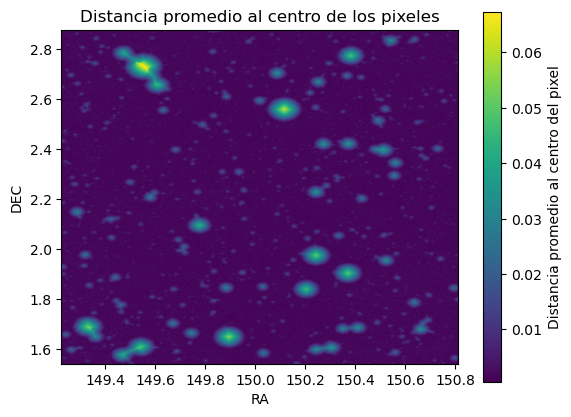

In [31]:
from tqdm import tqdm
import sys

ra = catalog["ra"]
dec = catalog["dec"]
ra_min, ra_max = min(ra), max(ra)
dec_min, dec_max = min(dec), max(dec)
pixel_size = 0.005

ra_centers = np.arange(ra_min + 2*pixel_size, ra_max - 2*pixel_size, pixel_size)
dec_centers = np.arange(dec_min + 2*pixel_size, dec_max - 2*pixel_size, pixel_size)

distances = np.zeros((len(ra_centers), len(dec_centers)))
rho = np.zeros((len(ra_centers), len(dec_centers)))
N = 0
N_max_iter = 5

for i in tqdm(range(len(ra_centers)), desc = "Calculando densidad..."):
    for j in range(len(dec_centers)):
        dists = []
        pixs = pixel_size
        nslices = 0
        while True:
            sys.stdout.write("\rpixel size = %.5f" % pixs)
            sys.stdout.flush()
            mask = np.where((ra <= ra_centers[i] + pixs/2) & (ra >= ra_centers[i] - pixs/2)
                            & (dec <= dec_centers[j] + pixs/2) & (dec >= dec_centers[j] - pixs/2))
            ras,decs = np.array(ra)[mask],np.array(dec)[mask]
            dists = np.sqrt((ras - ra_centers[i])**2 + (decs - dec_centers[j])**2)
            dists.sort()
            if len(dists) > 5:
                distances[i, j] = dists[4]
                rho[(i-nslices):(i+nslices),(j-nslices):(j+nslices)] = 5/(4 * np.pi * dists[4]**2)
                break
            else:
                pixs += pixel_size
                nslices += 1
                continue

print(f" Densidad promedio por pixel \033[91m{N / (len(ra_centers)*len(dec_centers))} \033[0m gax/pix")

ax = plt.axes()
plt.imshow(distances, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower',cmap='viridis')
plt.colorbar(label='Distancia promedio al centro del pixel')
ax.set(xlabel = 'RA', ylabel = 'DEC', title = 'Distancia promedio al centro de los pixeles')
plt.show()

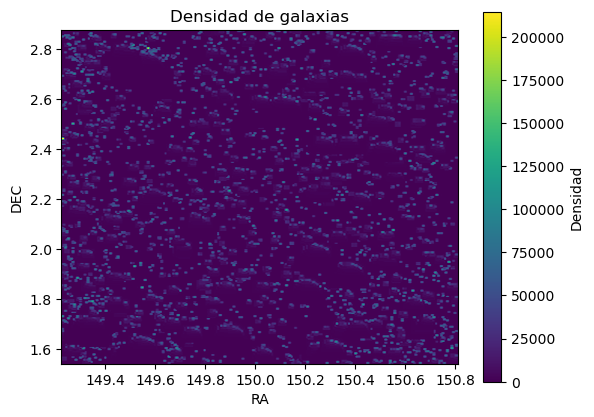

In [32]:
from matplotlib.colors import LogNorm
fig = plt.figure()
ax = plt.axes()
plt.imshow(rho, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='viridis', interpolation = "spline36")
plt.colorbar(label='Densidad')
ax.set(xlabel = "RA", ylabel = "DEC", title = 'Densidad de galaxias')
plt.show()